In [2]:
import pandas as pd

df = pd.read_csv('NPO.csv')

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Reseach Question: Which cohorts have the highest rates of obesity (age, race, gender, income, education and state)?

Dataset Documentation (Markdown)

1. Source: https://catalog.data.gov/dataset/nutrition-physical-activity-and-obesity-behavioral-risk-factor-surveillance-system
2. This dataset includes data on adult's diet, physical activity, and weight status including different cohorts like age, race, and state.
3. Time Period: 2011-2023
4. I chose the dataset because it has more than enough data to answer my question.

Removing null values from a column related to my research question.

In [3]:
import pandas as pd

# Load your dataset
df = pd.read_csv('NPO.csv')
df.head(10)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$15,000 - $24,999",INC,INC1525
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$25,000 - $34,999",INC,INC2535
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$35,000 - $49,999",INC,INC3550
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$50,000 - $74,999",INC,INC5075
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$75,000 or greater",INC,INC75PLUS
5,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Age (years),18 - 24,AGEYR,AGEYR1824
6,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
7,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Age (years),25 - 34,AGEYR,AGEYR2534
8,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Age (years),35 - 44,AGEYR,AGEYR3544
9,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Age (years),45 - 54,AGEYR,AGEYR4554


In [9]:
# Remove rows where the 'Stratification1' column is null (NaN)
df_cleaned = df.dropna(subset='Stratification1')

Cleaning - Checked for duplicate rows

In [10]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# (Optional) See how many rows were removed
print(f"Original rows: {len(df)}")
print(f"Rows after removing duplicates: {len(df_cleaned)}")

# Save the cleaned data to a new CSV file
df_cleaned.to_csv('your_file_cleaned.csv', index=False)

print("Duplicates removed. Cleaned file saved as 'your_file_cleaned.csv'.")


Original rows: 106260
Rows after removing duplicates: 106260
Duplicates removed. Cleaned file saved as 'your_file_cleaned.csv'.


In [6]:
df = pd.read_csv('your_file_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106260 entries, 0 to 106259
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   106260 non-null  int64  
 1   YearEnd                     106260 non-null  int64  
 2   LocationAbbr                106260 non-null  object 
 3   LocationDesc                106260 non-null  object 
 4   Datasource                  106260 non-null  object 
 5   Class                       106260 non-null  object 
 6   Topic                       106260 non-null  object 
 7   Question                    106260 non-null  object 
 8   Data_Value_Unit             0 non-null       float64
 9   Data_Value_Type             106260 non-null  object 
 10  Data_Value                  93505 non-null   float64
 11  Data_Value_Alt              93505 non-null   float64
 12  Data_Value_Footnote_Symbol  12755 non-null   object 
 13  Data_Value_Foo

In [7]:
df.describe()

,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
count,106260.000000,106260.000000,0.0,93505.000000,93505.000000,93505.000000,93505.000000,93505.000000,106260.000000
mean,2016.942029,2016.942029,NaN,31.849359,31.849359,27.452834,36.803022,3623.035260,31.854545
std,3.748966,3.748966,NaN,10.417933,10.417933,10.204503,11.343284,18561.958269,18.392198
min,2011.000000,2011.000000,NaN,0.900000,0.900000,0.300000,3.000000,50.000000,1.000000
25%,2014.000000,2014.000000,NaN,24.900000,24.900000,20.400000,29.200000,499.000000,17.000000
50%,2017.000000,2017.000000,NaN,31.700000,31.700000,27.300000,36.500000,1085.000000,31.000000
75%,2020.000000,2020.000000,NaN,37.500000,37.500000,33.400000,42.900000,2397.000000,46.000000
max,2023.000000,2023.000000,NaN,85.300000,85.300000,74.700000,92.400000,476876.000000,78.000000


I manually checked to see if the datatypes were correct and they were, so no additional code fixing that was necessary.

After attempting to remove duplicates and null values for the category that I am investigating with my research question, nothing was changed showing that this was a well developed dataset.

Process / Aggregate: I added a new column that displays the highest data value recorded for each stratification/cohort. This is helpful because each U.S. state has its own statistics based on their population. Marking the highest values allows the viewer to identify the cohorts that have the highest rates of obesity in the United States and not just an individual state. If actions were to be taken to reduce obesity, the additional column is helpful for identifying which areas need the most support/funding/research.

In [8]:
# Create a new column with the max value per group (e.g., 'Category')
df['Max_Value'] = df.groupby('Stratification1')['Data_Value'].transform('max')

# Preview
df.head()


,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Max_Value
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,OWS,OWS1,Q036,VALUE,1,Income,"$15,000 - $24,999",INC,INC1525,59.8
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,OWS,OWS1,Q036,VALUE,1,Income,"$25,000 - $34,999",INC,INC2535,67.5
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,OWS,OWS1,Q036,VALUE,1,Income,"$35,000 - $49,999",INC,INC3550,68.6
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,OWS,OWS1,Q036,VALUE,1,Income,"$50,000 - $74,999",INC,INC5075,68.4
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,OWS,OWS1,Q036,VALUE,1,Income,"$75,000 or greater",INC,INC75PLUS,80.0


Query - I querried for data from the year 2023 which is the most recent data the dataset contains. This is helpful as it ensures that the rates of obesity represent as close to the present as possible.

In [19]:
df = pd.read_csv('your_file_cleaned.csv', parse_dates=['YearEnd'])  # Ensure 'YearEnd' is parsed as datetime

# Filter rows where the YearEnd column equals 2023

df_2023 = df[df['YearEnd'].dt.year == 2023]

df_2023.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Max_Value
95480,2023,2023-01-01,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,OWS,OWS1,Q036,VALUE,1,Income,"$15,000 - $24,999",INC,INC1525,59.8
95481,2023,2023-01-01,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,OWS,OWS1,Q036,VALUE,1,Income,"$25,000 - $34,999",INC,INC2535,67.5
95482,2023,2023-01-01,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,OWS,OWS1,Q036,VALUE,1,Income,"$35,000 - $49,999",INC,INC3550,68.6
95483,2023,2023-01-01,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,OWS,OWS1,Q036,VALUE,1,Income,"$50,000 - $74,999",INC,INC5075,68.4
95484,2023,2023-01-01,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,OWS,OWS1,Q036,VALUE,1,Income,"$75,000 or greater",INC,INC75PLUS,80.0


Visualize

The first chart shows the top ten U.S states or territories that have the highest average reported obesity rate. This helps answer my research question by identifying the most obese locations.

The second chart shows how the average obesity rates in the United States and its territories has changed over time. This give insight onto the direction things are going and does potentially show evidence of certain measures working to stop the rising obesity rates as signaled by the plateau.

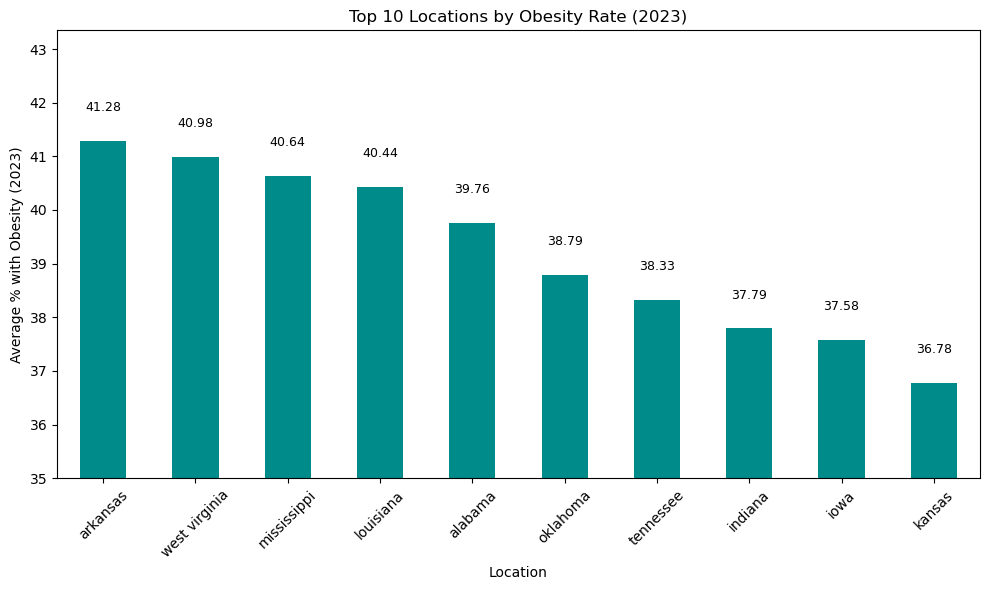

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean the dataset
df = pd.read_csv('df_with_max.csv', parse_dates=['YearEnd'])
df.columns = df.columns.str.strip()

# Clean strings
df['LocationDesc'] = df['LocationDesc'].astype(str).str.strip().str.lower()
df['Question'] = df['Question'].astype(str).str.strip()

# Filter to 2023
df_2023 = df[df['YearEnd'].dt.year == 2023]

# Filter to only rows where Question is about adult obesity
obesity_filter = 'Percent of adults aged 18 years and older who have obesity'
df_filtered = df_2023[df_2023['Question'] == obesity_filter]

# Drop missing values
df_filtered = df_filtered.dropna(subset=['LocationDesc', 'Data_Value'])
df_filtered['Data_Value'] = pd.to_numeric(df_filtered['Data_Value'], errors='coerce')

# Group by Location and calculate average Data_Value
avg_by_location = df_filtered.groupby('LocationDesc')['Data_Value'].mean().sort_values(ascending=False)

# Select top 10
top_10 = avg_by_location.head(10)

# Plot
plt.figure(figsize=(10, 6))
ax = top_10.plot(kind='bar', color='darkcyan')

plt.xlabel('Location')
plt.ylabel('Average % with Obesity (2023)')
plt.title('Top 10 Locations by Obesity Rate (2023)')
plt.xticks(rotation=45)
plt.ylim(bottom=35)
plt.tight_layout()

# Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 0.5,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.show()

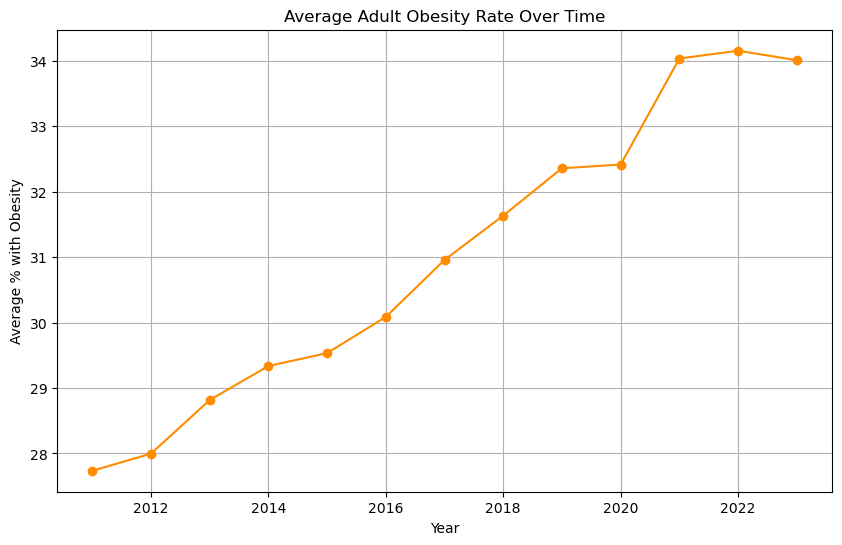

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and parse the date column
df = pd.read_csv('df_with_max.csv', parse_dates=['YearEnd'])
df.columns = df.columns.str.strip()

# Clean strings
df['Question'] = df['Question'].astype(str).str.strip()
df['LocationDesc'] = df['LocationDesc'].astype(str).str.strip()

# Filter to the obesity-related question
obesity_question = 'Percent of adults aged 18 years and older who have obesity'
df_obesity = df[df['Question'] == obesity_question]

# Drop missing or invalid values
df_obesity = df_obesity.dropna(subset=['Data_Value', 'YearEnd'])
df_obesity['Data_Value'] = pd.to_numeric(df_obesity['Data_Value'], errors='coerce')

# Extract year from the YearEnd column
df_obesity['Year'] = df_obesity['YearEnd'].dt.year

# Group by year and calculate average Data_Value
avg_by_year = df_obesity.groupby('Year')['Data_Value'].mean()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(avg_by_year.index, avg_by_year.values, marker='o', linestyle='-', color='darkorange')

plt.title('Average Adult Obesity Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Average % with Obesity')
plt.grid(True)